In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

In [2]:
%matplotlib widget

$$f^\dagger_X(t) \propto \exp\left(-i\frac{1}{2}\kappa t^2\right)f_X(t)$$

Then we can also consider $\Delta E(p_i)$ as a function of $p$:

$$\alpha(\mathbf{p}) = \Delta E(\mathbf{p_i}) = \frac{1}{2}\left(\mathbf{p}^2 + 2\mathbf{p}\mathbf{A_{IR}}(\tau) + \mathbf{A_{IR}}^2(\tau) - \mathbf{p_0}^2\right)$$

and then
$$a(\mathbf{p}, \tau) = \int_{-\infty}^{\infty} dt e^{-t^2 \mu} e^{i\alpha t} = \sqrt{\frac{\pi}{\mu}} e^{-\alpha^2/(4\mu)}$$

$$\mu = \frac{1}{2\sigma^2} + i\frac{\kappa}{2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$

In [66]:
# conversion function between atomic unit energies and eV 
PToEv = lambda p:  p*27.21
EvToP = lambda Ev:  Ev/27.21

# and atomic time and fsec 
autTtoFsec = lambda a: a*2.41e-2
FsecToaut = lambda f: f/2.41e-2

In [67]:
# envelope for gauss pulse
def f_ir(tau, sigma_IR):
    return np.exp(-tau**2/(2*sigma_IR**2))

In [81]:
# envelope for gauss pulse
def f_xuv(tau, sigma_XUV):
    return np.exp(-tau**2/(2*sigma_XUV**2))

In [68]:
def F_IR(tau, sigma_IR, F_const_IR, omega_IR, phase = 0):
    return F_const_IR * f_ir(tau, sigma_IR) * np.cos(omega_IR * tau + phase)

In [71]:
def F_XUV(t, sigma_XUV, F_const_XUV, omega_XUV, phase = 0):
    return F_const_XUV * f_xuv(t, sigma_XUV) * np.cos(omega_XUV * t + phase)

# Task 1

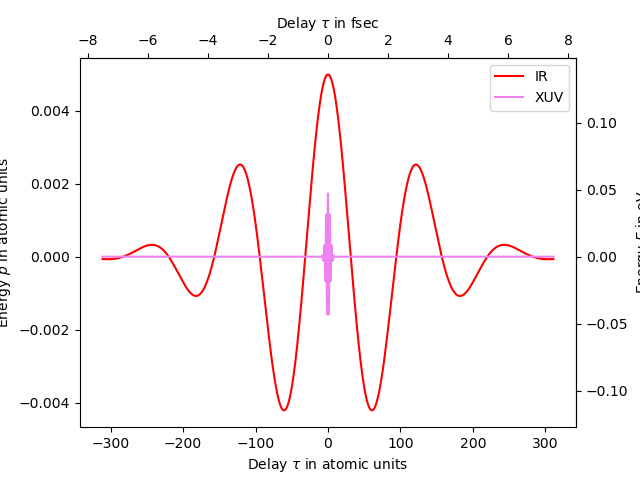

In [92]:
plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")

tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 1500)

# 6 fsec
sigma_IR = FsecToaut(6/(2*np.sqrt(2*np.log(2))))

# 300 asec
sigma_XUV = FsecToaut(0.150/(2*np.sqrt(2*np.log(2))))


plt.plot(tau, F_IR(tau, sigma_IR, 1/200., 0.05), label="IR", color="red")
plt.plot(tau, F_XUV(tau, sigma_XUV, 1/500., 2.5), label="XUV", color="violet")
plt.legend()
plt.savefig('ir_xuv_pulse.png', bbox_inches='tight', dpi=300)

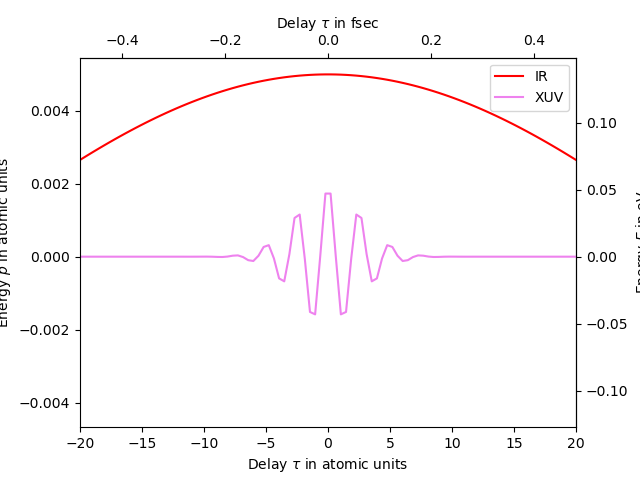

In [94]:
plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")
plt.xlim(-20, 20)
tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 1500)

# 6 fsec
sigma_IR = FsecToaut(6/(2*np.sqrt(2*np.log(2))))

# 300 asec
sigma_XUV = FsecToaut(0.150/(2*np.sqrt(2*np.log(2))))


plt.plot(tau, F_IR(tau, sigma_IR, 1/200., 0.05), label="IR", color="red")
plt.plot(tau, F_XUV(tau, sigma_XUV, 1/500., 2.5), label="XUV", color="violet")
plt.legend()
plt.savefig('ir_xuv_pulse_zoom_in.png', bbox_inches='tight', dpi=300)

In [4]:
# vector potential
def A_ir(tau, sigma_IR, F_const_IR, omega_IR):
    # only sin
    return - F_const_IR * f_ir(tau, sigma_IR) * np.sin(omega_IR*tau) / omega_IR

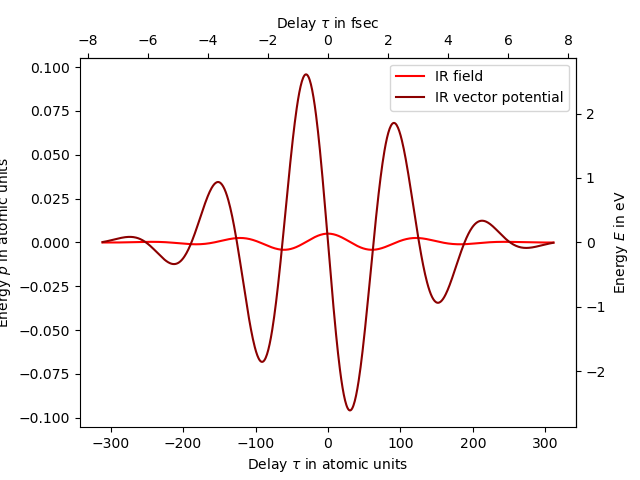

In [98]:
plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")
tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 700)

# 6 fsec
sigma_IR = FsecToaut(6/(2*np.sqrt(2*np.log(2))))

# 300 asec
sigma_XUV = FsecToaut(0.150/(2*np.sqrt(2*np.log(2))))


plt.plot(tau, F_IR(tau, sigma_IR, 1/200., 0.05), label="IR field", color="red")
plt.plot(tau, A_ir(tau, sigma_IR, 1/200, 0.05), label=r"IR vector potential", color='darkred')
plt.legend()
plt.savefig('ir_pulse_ir_potential.png', bbox_inches='tight', dpi=300)

In [139]:
# all times in femtoseconds
def a(p, tau, kappa=0.1, fwhm_xuv=0.3, fwhm_ir=6, F_intensity_IR=1./200, phase = 0):
    omega_X = 2.5
    I_p = 0.5
    p_0_sq = 2 * (omega_X - I_p)
    # from femtosecond fwhm to atomic time units
    sigma_XUV = fwhm_xuv / (2*np.sqrt(2*np.log(2))) / 2.41e-2
    
    F_const_IR = F_intensity_IR
    omega_IR = 0.05
    # from femtosecond fwhm to atomic time units
    sigma_IR = fwhm_ir/(2*np.sqrt(2*np.log(2))) / 2.41e-2

    # gaussian envelope
    f_ir_cal = np.exp(-tau**2/(2*sigma_IR**2))

    # electric field
    F_ir_calc = F_const_IR * f_ir(tau, sigma_IR) * np.cos(omega_IR * tau + phase)

    # vector potential
    A_ir_calc = - F_const_IR * f_ir(tau, sigma_IR) * np.sin(omega_IR * tau + phase) / omega_IR
    
    alpha = 0.5*(p**2 + 2*p*A_ir_calc - p_0_sq)
    mu = 1/(2*sigma_XUV**2) + 0.5j*kappa + 0.5j*(p + A_ir_calc) * F_ir_calc  # where (p + A_ir) is the brackets for p_i 

    f = np.sqrt(np.pi/mu) * np.exp(-alpha**2/(4*mu))
    print(f"kappa = {kappa:.2f}, sigma_xuv = {sigma_XUV:.2f}, sigma_ir = {sigma_IR:.2f}, F_intensity_IR = {F_intensity_IR:.1e}")
    return np.abs(f).T

kappa = 0.00, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 5.0e-03


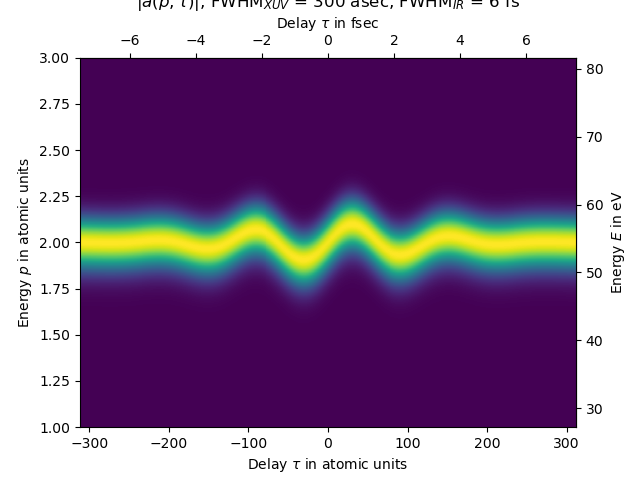

In [142]:
plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")


p = np.linspace(1, 3, 1000)
tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau, kappa=0, F_intensity_IR=1/200.)
plt.title(r"$|a(p, \tau)|$, FWHM$_{XUV}$ = 300 asec, FWHM$_{IR}$ = 6 fs")

plt.pcolormesh(tau, p, res)

plt.savefig('spectrogram_300asec.png', bbox_inches='tight', dpi=300)

# Derive the pulse length

kappa = 0.00, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 5.0e-03


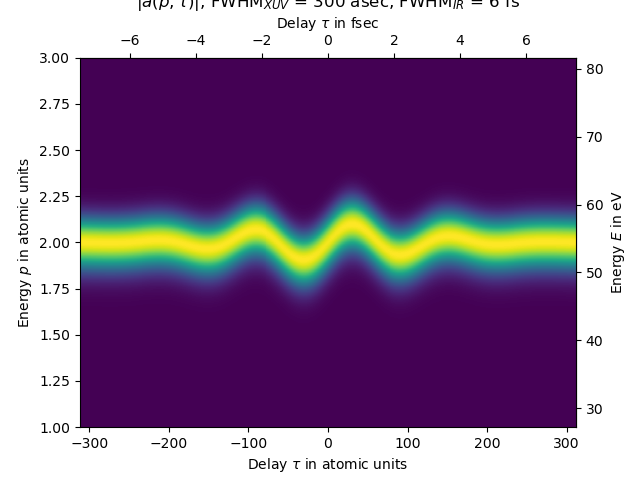

In [215]:
plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")


p = np.linspace(1, 3, 1000)
tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau, kappa=0, F_intensity_IR=1/200.)
plt.title(r"$|a(p, \tau)|$, FWHM$_{XUV}$ = 300 asec, FWHM$_{IR}$ = 6 fs")

plt.pcolormesh(tau, p, res)
plt.savefig('spectrogram_300ases_sample_for_fit.png', bbox_inches='tight', dpi=300)

In [201]:
from lmfit import Model
from lmfit.models import GaussianModel, ConstantModel

In [176]:
def cos_model(x, omega, phase):
    return np.cos(x*omega + phase)

In [202]:
cos_mod = Model(cos_model)
comp_mod = cos_mod * GaussianModel() + ConstantModel()


In [203]:
comp_params = comp_mod.make_params()
comp_params['omega'].min = 1
comp_params['phase'].min = -np.pi
comp_params['phase'].max = np.pi
comp_mod_res = comp_mod.fit(data=p_retrieve, params=comp_params, x=tau_retrieve)




[[Model]]
    ((Model(cos_model) * Model(gaussian)) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 439
    # data points      = 20837
    # variables        = 6
    chi-square         = 12.1025504
    reduced chi-square = 5.8099e-04
    Akaike info crit   = -155245.932
    Bayesian info crit = -155198.265
    R-squared          = 0.72089504
[[Variables]]
    omega:      1420.59602 +/- 9.0030e-05 (0.00%) (init = 1)
    phase:     -1.57033976 +/- 0.00442842 (0.28%) (init = -3.141593)
    amplitude:  26.4873805 +/- 0.18828063 (0.71%) (init = 1)
    center:     0.10712977 +/- 0.64214921 (599.41%) (init = 0)
    sigma:      105.616060 +/- 0.77336872 (0.73%) (init = 1)
    c:          1.99989751 +/- 1.6698e-04 (0.01%) (init = 0)
    fwhm:       248.706811 +/- 1.82114413 (0.73%) == '2.3548200*sigma'
    height:     0.10005047 +/- 5.3414e-04 (0.53%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)

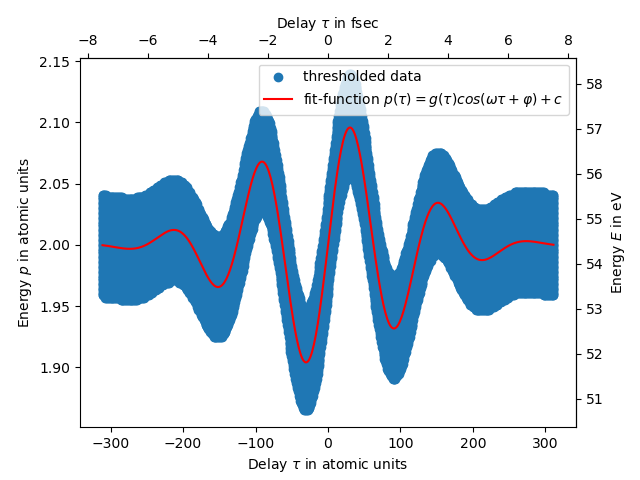

In [226]:
plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")
arg_y, arg_x = np.where(res > 12.)
# sort the taus
tau_args = np.argsort(arg_x)
# sort the values 
tau_retrieve = tau[arg_x[tau_args]]
p_retrieve = p[arg_y[tau_args]]

plt.scatter(tau_retrieve, p_retrieve, label='thresholded data')
comp_mod_res = comp_mod.fit(data=p_retrieve, params=comp_params, x=tau_retrieve)
plt.plot(tau_retrieve, comp_mod_res.best_fit, color='red', label=r'fit-function $p(\tau) =  g(\tau)cos(\omega \tau + \varphi) + c$')
print(comp_mod_res.fit_report())
plt.legend()
plt.savefig('fit_th.png', bbox_inches='tight', dpi=300)

In [272]:
def slice_p(p, amp=1, tau = 0., sigma_xuv=5.23, kappa=0):
    A = 2/sigma_xuv**2
    omega_IR = 0.05
    sigma_IR = 105.72
    F_const_IR = 1/200.
    p_0_sq = 4

    # gaussian envelope
    f_ir_cal = np.exp(-tau**2/(2*sigma_IR**2))

    # electric field
    F_ir_calc = F_const_IR * f_ir(tau, sigma_IR) * np.cos(omega_IR * tau)

    # vector potential
    A_ir_calc = - F_const_IR * f_ir(tau, sigma_IR) * np.sin(omega_IR * tau) / omega_IR
    
    alpha = 0.5*(p**2 + 2*p*A_ir_calc - p_0_sq)

    B_tau = 2*kappa + 2*(p + A_ir_calc)*F_ir_calc
    
    return amp*np.exp(-A*alpha**2/(A**2 + B_tau**2))

In [273]:
slice_model = Model(slice_p)

In [274]:
slice_params = slice_model.make_params()

[[Model]]
    Model(slice_p)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 1000
    # variables        = 4
    chi-square         = 9.6601e-18
    reduced chi-square = 9.6989e-21
    Akaike info crit   = -46078.2874
    Bayesian info crit = -46058.6563
    R-squared          = 1.00000000
[[Variables]]
    amp:        13.2505792 +/- 1.3196e-11 (0.00%) (init = 1)
    tau:       -308.706455 +/- 2.2035e-09 (0.00%) (init = -300)
    sigma_xuv:  5.28623517 +/- 1.0283e-10 (0.00%) (init = 5.23)
    kappa:     -1.6926e-08 +/- 1.8530e-10 (1.09%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma_xuv, kappa) = -0.9983
    C(tau, kappa)       = -0.7760
    C(tau, sigma_xuv)   = +0.7747


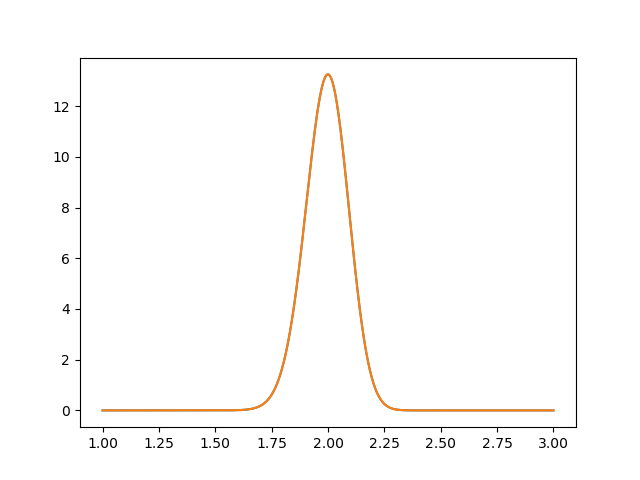

In [278]:
# calculating the standard deviation for each tau
# and then averaging
slice_from_res = res[:, 2]
plt.figure()
plt.plot(p, slice_from_res)
slice_params['tau'].value = -300
slice_res = slice_model.fit(data=res[:, 2], params=slice_params, p=p)
print(slice_res.fit_report())
plt.plot(p, slice_res.best_fit)

kappa = 0.00, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 5.0e-03
kappa = 0.00, sigma_xuv = 2.64, sigma_ir = 105.72, F_intensity_IR = 5.0e-03
kappa = 0.00, sigma_xuv = 1.32, sigma_ir = 105.72, F_intensity_IR = 5.0e-03


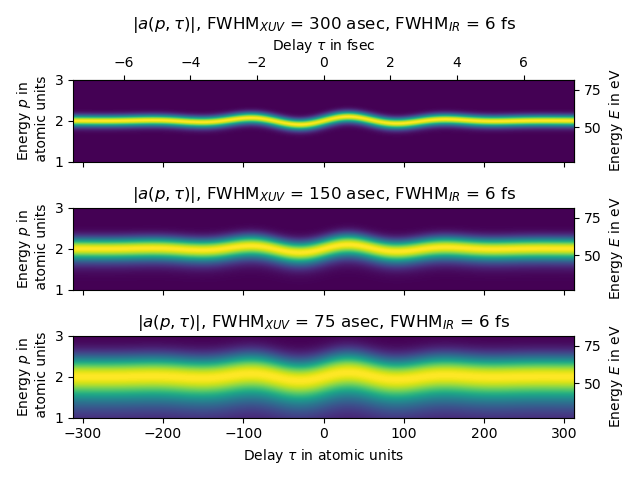

In [126]:
fig, axs = plt.subplots(3, 1, sharex=True)
fwhms = [0.3,  0.15, 0.075 ]
for ax, fwhm_xuv in zip(axs, fwhms):
    
    ax.set_ylabel("Energy $p$ in\n atomic units")
    secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
    #secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
    secy.set_ylabel("Energy $E$ in eV")
    #secx.set_xlabel(r"Delay $\tau$ in fsec")
    
    
    p = np.linspace(1, 3, 1000)
    tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 500)
    pp, tautau = np.meshgrid(p, tau)
    res = a(pp, tautau, fwhm_xuv=fwhm_xuv, kappa=0, F_intensity_IR=1/200.)
    ax.set_title(r"$|a(p, \tau)|$, FWHM$_{XUV}$ = %d asec, FWHM$_{IR}$ = 6 fs" % (fwhm_xuv*1000))
    ax.pcolormesh(tau, p, res)

secx = axs[0].secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secx.set_xlabel(r"Delay $\tau$ in fsec")
ax.set_xlabel(r"Delay $\tau$ in atomic units")

plt.tight_layout()
plt.savefig('spectrogram_' + str(fwhms) + '.png', bbox_inches='tight', dpi=300)

# Task 2

kappa = 0.01, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 1.0e-02
kappa = 0.03, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 1.0e-02
kappa = 0.10, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 1.0e-02


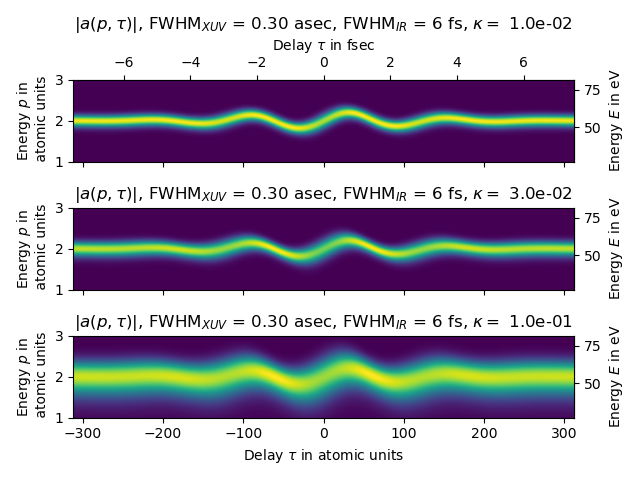

In [137]:
fig, axs = plt.subplots(3, 1, sharex=True)
kappas = [1e-2, 3e-2, 1e-1 ]
fwhm_xuv = 0.3
for ax, kappa in zip(axs, kappas):
    
    ax.set_ylabel("Energy $p$ in\n atomic units")
    secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
    #secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
    secy.set_ylabel("Energy $E$ in eV")
    #secx.set_xlabel(r"Delay $\tau$ in fsec")
    
    
    p = np.linspace(1, 3, 1000)
    tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 500)
    pp, tautau = np.meshgrid(p, tau)
    res = a(pp, tautau, fwhm_xuv=fwhm_xuv, kappa=kappa, F_intensity_IR=1/100.)
    ax.set_title(r"$|a(p, \tau)|$, FWHM$_{XUV}$ = %.2f asec, FWHM$_{IR}$ = 6 fs, $\kappa = $ %1.1e" % (fwhm_xuv, kappa))
    ax.pcolormesh(tau, p, res)

secx = axs[0].secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secx.set_xlabel(r"Delay $\tau$ in fsec")
ax.set_xlabel(r"Delay $\tau$ in atomic units")

plt.tight_layout()
plt.savefig('spectrogram_kappa_' + str(kappas) + '.png', bbox_inches='tight', dpi=300)

kappa = 0.00, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 1.0e-02


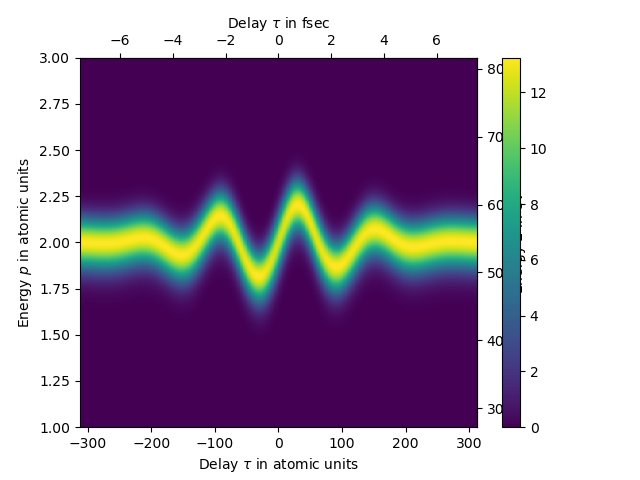

In [148]:
plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")


p = np.linspace(1, 3, 1000)
tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau, kappa=1e-3, F_intensity_IR=1/100.)


mesh = plt.pcolormesh(tau, p, res)
plt.colorbar(mesh)

kappa = 0.10, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 5.0e-03


interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

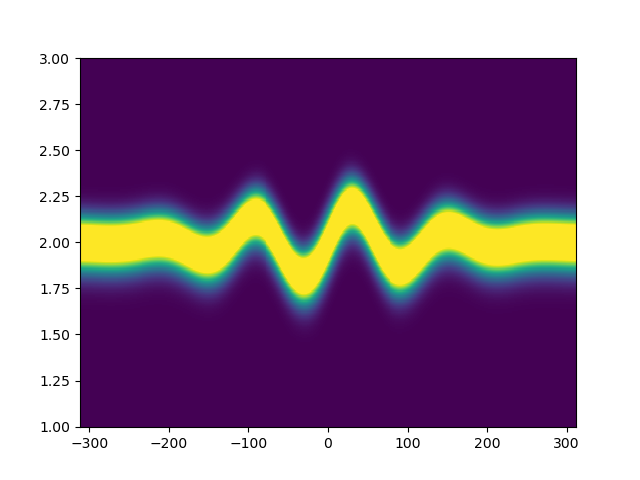

In [162]:
p = np.linspace(1, 3, 300)
tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau)

fig = plt.figure()

plot2d = plt.pcolormesh(tau, p, res)

def update(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100, phase=0):
    plot2d.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR, phase=phase))
    fig.canvas.draw_idle()
    
interact(update, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001), phase = (-np.pi, np.pi, 0.0001));

0.1 5.286235271502194 105.72470543004387 0.005


interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

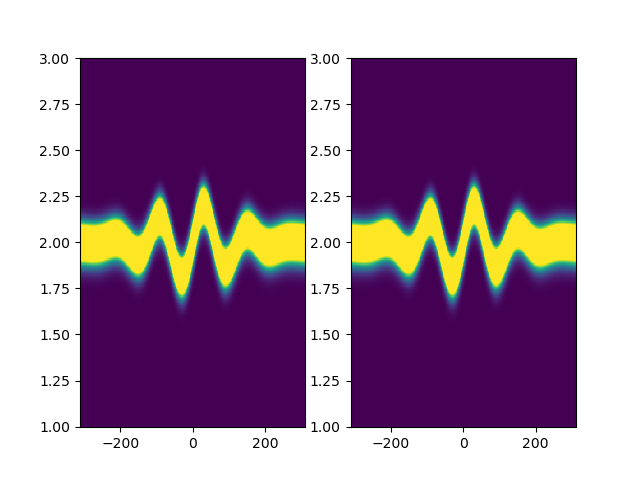

In [18]:
p = np.linspace(1, 3, 300)
tau = np.linspace(-7.5/ 2.41e-2, 7.5/2.41e-2, 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau)**2

fig, axs = plt.subplots(1, 2)

plot2d_left = axs[0].pcolormesh(tau, p, res)
plot2d_right = axs[1].pcolormesh(tau, p, res)

def update_left(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100):
    plot2d_left.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR)**2)
    fig.canvas.draw_idle()

def update_right(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100):
    plot2d_right.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR)**2)
    fig.canvas.draw_idle()
    
interact(update_left, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001));
interact(update_right, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001));

0.09 5.286235271502194 105.72470543004387 0.02


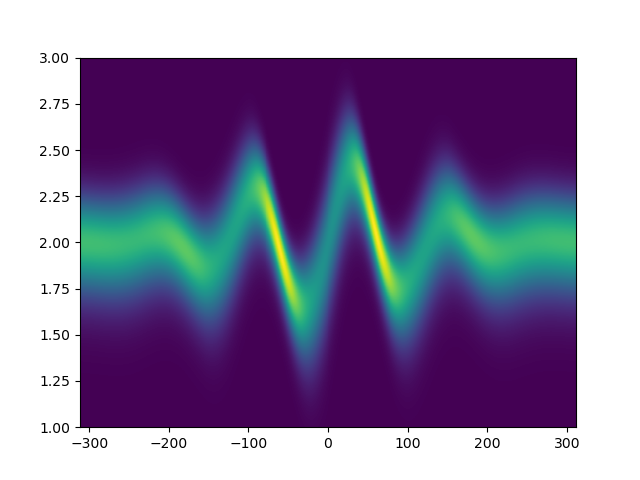

In [17]:
plt.figure()
p = np.linspace(1, 3, 1000)
tau = np.linspace(-7.5/ 2.41e-2, 7.5/2.41e-2, 1000)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau, kappa=0.09, F_intensity_IR=0.02)**2
plt.pcolormesh(tau, p, res)

# $\kappa$ extraction

With the final expression for $a(p, \tau)$ is given by:
$$ a(p, \tau) \propto e^{-\frac{\alpha(\mathbf{p})^2}{4\mu(\tau)}}$$

$$\alpha(\mathbf{p}) = \Delta E(\mathbf{p_i}) = \frac{1}{2}\left(\mathbf{p}^2 + 2\mathbf{p}\mathbf{A_{IR}}(\tau) + \mathbf{A_{IR}}^2(\tau) - \mathbf{p_0}^2\right)$$

$$\mu = \frac{1}{2\sigma^2} + i\frac{\kappa}{2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$


The measured attribute is rathen an absoulute value of $a(\mathbf{p}, \tau)$. We also can get the $\ln$ of the observed spectrogram to get
$$\ln(|a(\mathbf{p}, \tau)|) \propto \Re\left[-\alpha(\mathbf{p})^2/(4\mu(\tau)) \right],$$
where $\alpha(\mathbf{p}) \in \mathbb{R}$ and $\mu(\tau) \in \mathbb{C}$.

With the subsitution:

$$\gamma(\tau) = 4\mu(\tau) = \frac{2}{\sigma^2} + 2i\kappa + 2i\mathbf{p_i F_{IR}}(\tau)$$

we get 
$$\Re\left[-\alpha(\mathbf{p})^2/\gamma(\tau) \right],$$
where $\alpha(\mathbf{p}) \in \mathbb{R}$ and $\mu(\tau) \in \mathbb{C}$.

The $\gamma(\tau)$ can be expressed as following:

$$ \gamma(\tau) = \underbrace{\frac{2}{\sigma^2}}_{=A} + i\underbrace{\left(2\kappa + 2\mathbf{p_i F_{IR}}(\tau)\right)}_{=B(\tau)} = A + iB(\tau),$$

where $A, B \in \mathbb{R}$.

The expression of form
$$\Re\left[\alpha^2(\mathbf{p})/\gamma(\tau) \right],$$
where $\alpha(\mathbf{p}) \in \mathbb{R}$ and $\mu(\tau) \in \mathbb{C}$.

can be than further expressed in the form

$$\Re\left[-\alpha^2(\mathbf{p})/\gamma(\tau) \right] = \frac{-A\alpha^2(\mathbf{p}) }{A^2 + B^2(\tau)}$$

The equation for $B^2(\tau)$ can be then expressed in the following way:

$$B^2(\tau) = 4\kappa^2 + 8\underbrace{(\mathbf{p} + \mathbf{A_{IR}}(\tau))\mathbf{F_{IR}(\tau)}}_{=N} \kappa + 4\underbrace{(\mathbf{p} + \mathbf{A_{IR}}(\tau))^2F_{IR}^2}_{=D} $$

What is nothing but a quadratic equation for $\kappa$, with the simplification (division by 4) we get:

$$ \kappa = \frac{-N \pm \sqrt{N^2 - D}}{2}$$

To solve this equation we only need to determine the vector potential $\mathbf{A_{IR}}(\tau)$ which is easy to retrieve from the spectrogram.

With the detailed look at the 

$$ N = (\mathbf{p} + \mathbf{A_{IR}}(\tau))\mathbf{F_{IR}(\tau)} = (\mathbf{p} - Ff_{IR} \sin(\omega \tau)/\omega)F f_{IR} \cos(\omega \tau),$$

where $f_{IR}(\tau)$ - envelope of IR pulse, and $F$ - amplitude.

Then 
$$ N = Ff_{IR}\cos(\omega \tau) - \frac{1}{2\omega}F^2 f_{IR}^2\sin(2\omega\tau) \approx Ff_{IR}\cos(\omega \tau)$$